In [1]:
import sys

In [2]:
sys.path.append("..")

In [3]:
from LinearRegressionClass.model import Linear  

### Import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
X1= np.random.randn(1000,1)
X2=np.random.randn(1000,1)
b= np.random.randn(7)
e= np.random.randn(1000,1)
y = b[0] + b[1]*X1 + b[2]*X1**2 + b[3]*X1**3 + b[4]*X1*X2 + b[5]* (X1**2)* X2 + e +b[6] * X2**2
X = np.concatenate((X1,X2), axis=1)

In [6]:
X[:5]

array([[-0.17759273,  0.60162738],
       [ 0.90991647,  0.10877301],
       [-1.00950705,  1.16378449],
       [-0.86190974, -0.06943089],
       [-0.30871829,  0.57416441]])

In [7]:
y[:5]

array([[-0.70323246],
       [ 0.13617384],
       [ 4.60240131],
       [ 1.19620349],
       [-0.09091453]])

### Splitting The Data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [10]:
X_train.shape

(800, 2)

In [11]:
y_test.shape

(200, 1)

### Fitting the training Set

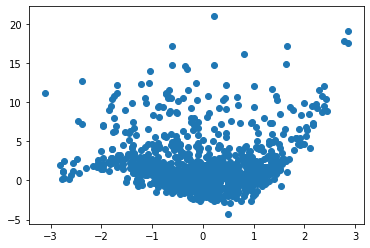

In [12]:
plt.scatter(X1, y)

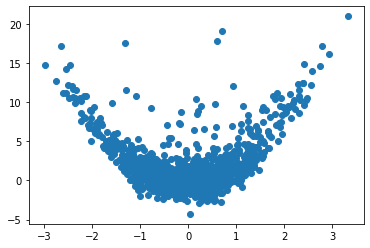

In [13]:
plt.scatter(X2, y)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from LinearRegressionClass.model import Linear
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [16]:
X_poly_train = poly.fit_transform(X_train)
X_poly_train.shape

(800, 9)

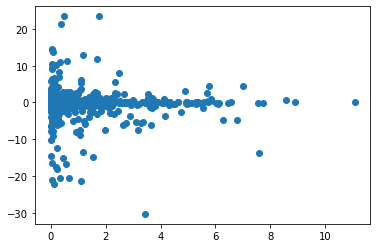

In [17]:
plt.scatter(X_poly_train[:,4], X_poly_train[:,5]) 

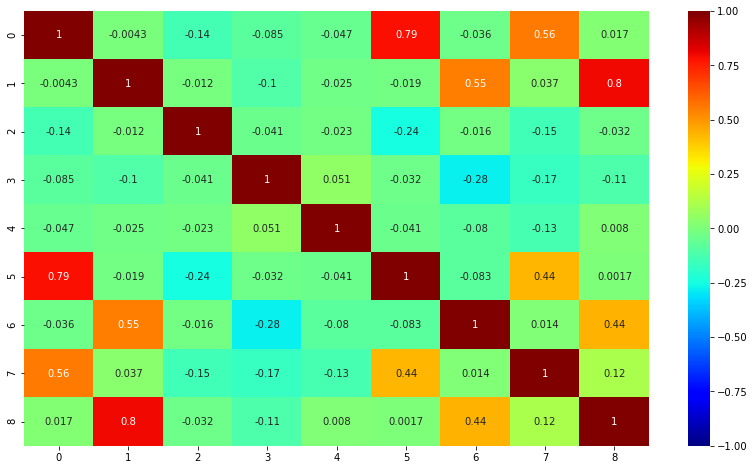

In [18]:
import seaborn as sns
df= pd.DataFrame(X_poly_train)
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), cmap="jet", annot= True, vmin=-1, vmax=1)

In [19]:
model = Linear(cozum="Gradient", lr= 0.0001,lamda= 2, max_iter=10**6, tol=10**-3)

In [20]:
model.katsayı(X_poly_train, y_train) # fit ettik

Linear(cozum=Gradient,lr=0.0001)

In [21]:
y_train_pred = model.tahmin_et(X_poly_train) # predict ettik

In [22]:
r2_score(y_train, y_train_pred)

0.9142513021774735

### Time to work on test set

In [23]:
X_poly_test = poly.transform(X_test)

In [24]:
y_pred = model.tahmin_et(X_poly_test)

In [25]:
r2_score(y_test, y_pred)

0.9204268747767906

In [26]:
mean_squared_error(y_test, y_pred)

0.8356266680984291

In [27]:
X1= np.random.randn(50000,1)
X2=np.random.randn(50000,1)
b= np.random.randn(7)
e= np.random.randn(50000,1)
y = b[0] + b[1]*X1 + b[2]*X1**2 + b[3]*X1**3 + b[4]*X1*X2 + b[5]* (X1**2)* X2 + e +b[6] * X2**2
X = np.concatenate((X1,X2), axis=1)

In [28]:
degree = range(1,14)
train_score=[]
test_score= []
for i in degree:
    poly=PolynomialFeatures(degree=i, include_bias=False)
    X_poly_train = poly.fit_transform(X_train)
    model = Linear(cozum="Normal")
    model.katsayı(X_poly_train, y_train)
    y_train_pred = model.tahmin_et(X_poly_train)
    train_score.append(r2_score(y_train, y_train_pred))
    X_poly_test = poly.transform(X_test)
    y_pred = model.tahmin_et(X_poly_test)
    test_score.append(r2_score(y_test, y_pred))

LinAlgError: SVD did not converge

In [ ]:
plt.plot(degree, train_score)
plt.plot(degree, test_score)